# Email Spam Classification 


- Dataset

https://archive.ics.uci.edu/ml/datasets/Spambase

- The dataset description:

No null  values





labels:

0:Not Spam 

1:Spam

- Algorithms used:

SVM

Naive bayes

Logistic regression




Importing libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Loading data

In [ ]:
# Loading dataset into pandas dataframe
data = pd.read_csv('/content/spambase.data', names=[x for x in range(58)])

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Data preprocessing

- Type of data attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

- Shape of data

In [ ]:
data.shape

(4601, 58)

# Visualization

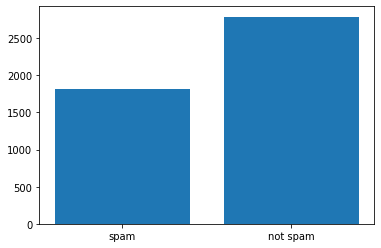

In [ ]:
a=data[57]
b=len(a[a==1])
c=len(a[a==0])
plt.bar(["spam","not spam"],[b,c])
plt.show()

# Selection and training a model

In [ ]:
Y = data[57]
del data[57]
X = data

In [ ]:
Y.value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [ ]:
# Now lets lets split dataset into train and test set using scikit learn
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
# Now using scikit learn lets scale dataset using standardscalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM

In [ ]:
from sklearn import svm
# Initialize SVM classifier
svmclf = svm.SVC(kernel='linear')
svmmclf = svmclf.fit(X_train, y_train)

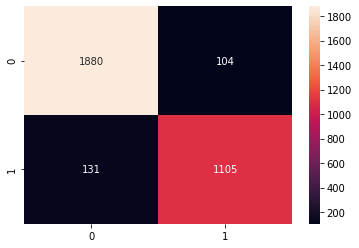

In [ ]:
from sklearn.model_selection import cross_val_predict
y_predsvm=cross_val_predict(svmclf,X_train,y_train,cv=10)
b=confusion_matrix(y_train,y_predsvm)
sns.heatmap(b,annot=True,fmt="d")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svmclf,X_train,y_train,cv=10,scoring="accuracy")

array([0.93167702, 0.90062112, 0.9068323 , 0.9378882 , 0.91614907,
       0.93478261, 0.94720497, 0.93478261, 0.92546584, 0.93478261])

classification report of svm classifier
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       804
           1       0.93      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



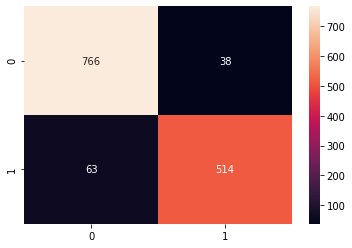

In [ ]:
svm_pred = svmclf.predict(X_test)
svmacc = accuracy_score(y_test,svm_pred)
conf=confusion_matrix(y_test,svm_pred)
print("classification report of svm classifier")
print(classification_report(y_test,svm_pred))
sns.heatmap(conf,annot=True,fmt="d")

logistic regression

with confusion matrix

In [ ]:
lrclf = LogisticRegression().fit(X_train, y_train)

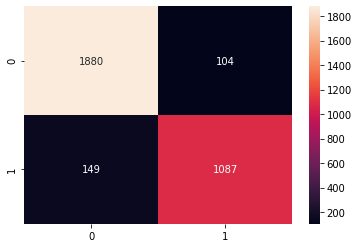

In [ ]:
from sklearn.model_selection import cross_val_predict
y_predlr=cross_val_predict(lrclf,X_train,y_train,cv=10)
c=confusion_matrix(y_train,y_predlr)
sns.heatmap(c,annot=True,fmt="d")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lrclf,X_train,y_train,cv=10,scoring="accuracy")

array([0.92857143, 0.90062112, 0.90372671, 0.94409938, 0.90062112,
       0.92236025, 0.94099379, 0.93478261, 0.90993789, 0.92857143])

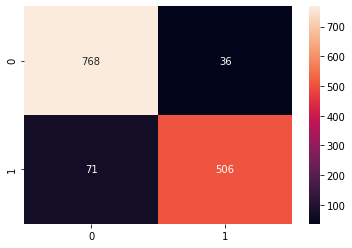

In [ ]:
lr_pred = lrclf.predict(X_test)
lracc = accuracy_score(y_test,lr_pred)
lrcm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lrcm,annot=True,fmt="d")

naive bayes

In [ ]:
nvclf = GaussianNB()
nvclf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

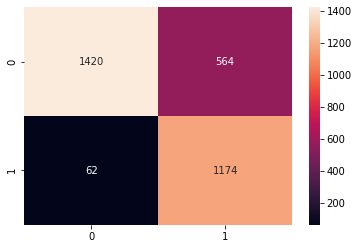

In [ ]:
from sklearn.model_selection import cross_val_predict
y_prednv=cross_val_predict(nvclf,X_train,y_train,cv=10)
d=confusion_matrix(y_train,y_prednv)
sns.heatmap(d,annot=True,fmt="d")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(nvclf,X_train,y_train,cv=10,scoring="accuracy")

array([0.80434783, 0.76397516, 0.80434783, 0.79813665, 0.79813665,
       0.8136646 , 0.82298137, 0.83540373, 0.7826087 , 0.83229814])

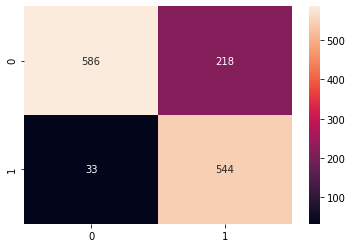

In [ ]:
# Predicting the Test set results
nv_pred = nvclf.predict(X_test)
nvacc = accuracy_score(y_test,nv_pred)
nvcm = confusion_matrix(y_test, nv_pred)
sns.heatmap(nvcm,annot=True,fmt="d")

**Accuracy**

In [ ]:
print("accuracy of models ")
print("svm",svmacc)
print("logistic regression",lracc)
print("Naive bayes",nvacc)

accuracy of models 
svm 0.9268645908761767
logistic regression 0.9225199131064447
Naive bayes 0.8182476466328747


# summary

SVM model give us the highest accuracy as compared to other models